In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Potential Problems with Linear Regression

1. Non-linear relationship between Y and X
2. Correlation of error terms
3. Non-constant variance of error terms
4. Outliers
5. High-leverage points
6. Collinearity

### Boston Housing Data

In [2]:
df = pd.read_csv("../../data/csv/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per \$10,000  
PTRATIO - pupil-teacher ratio by town  
BLACK - $1000(Bk - 0.63)^2$, where Bk is the proportion of blacks by town  
LSTAT - percentage lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### 6. Collinearity

Definition:  
Collinearity = two or more predictors are related to one another  
Multicollinearity = three or more predictors are related to one another

Identification:  
Large absolute values in the correlation matrix detects collinearity  
Large VIF (variance inflation factor) detects multicollinearity, where minimum VIF value is 1

Solution:  
Either drop one of the correlated variables, or  
combine the collinear variables to form a new variable

In [6]:
# Correlation Matrix
corr = df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


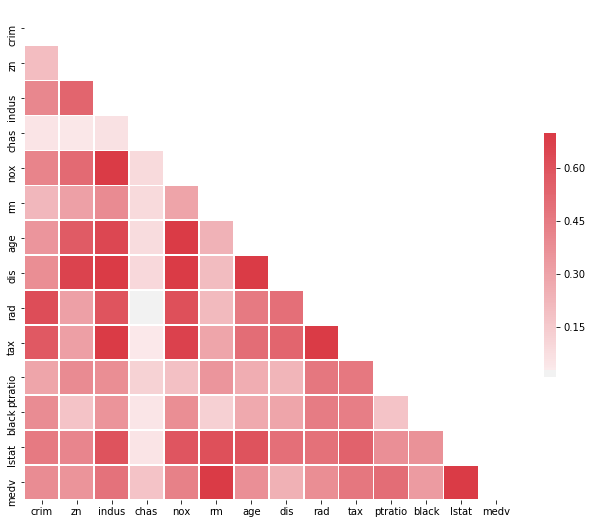

In [7]:
# Correlation Heatmap

# setup the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio; detecting absolute correlations >= 0.7
sns.heatmap(np.absolute(corr), mask=mask, cmap=cmap, vmax=.7, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Lots of collinear variables (absolute correlation value of >=0.7):   
indus, nox, age, dis, rad, tax are all correlated with each other, and  
medv, lstat, rm are correlated.  
We see strong patterns (not necessarily linear) in the graphs of each combination of these variables.

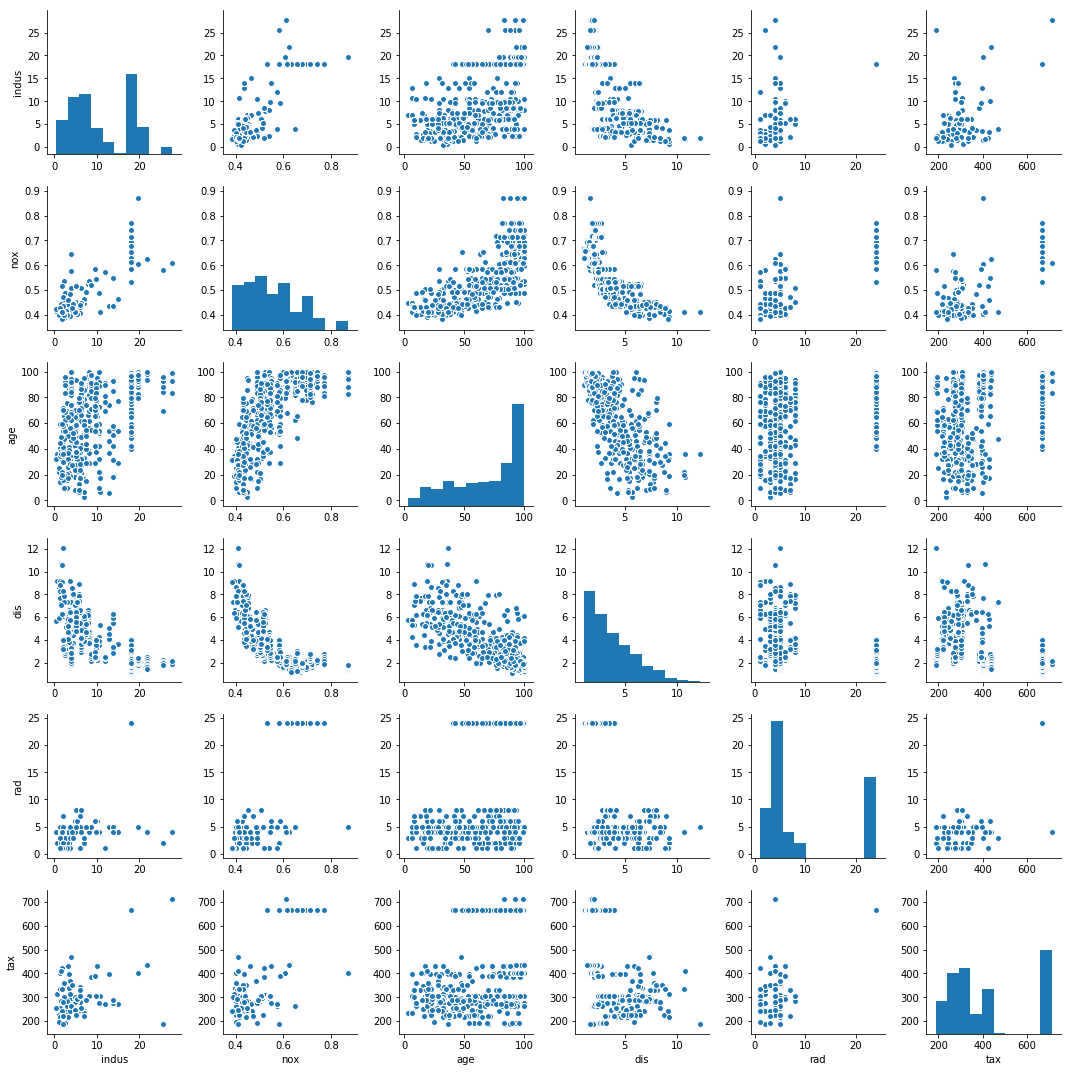

In [8]:
sns.pairplot(df, vars=['indus', 'nox', 'age', 'dis', 'rad', 'tax']);

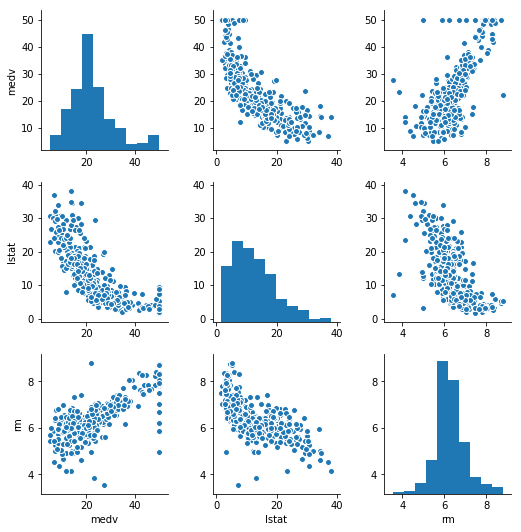

In [9]:
sns.pairplot(df, vars=['medv', 'lstat', 'rm']);

## Multiple Linear Regression

Regress medv (response) onto all other variables

In [10]:
model = LinearRegression()

### Model Fit

In [11]:
model.fit(X=df.iloc[:,:-1], y=df['medv'])

/Users/divyanair/.pyenv/versions/2.7.14/envs/islr_env/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print model.intercept_ 
print model.coef_

36.4594883851
[ -1.08011358e-01   4.64204584e-02   2.05586264e-02   2.68673382e+00
  -1.77666112e+01   3.80986521e+00   6.92224640e-04  -1.47556685e+00
   3.06049479e-01  -1.23345939e-02  -9.52747232e-01   9.31168327e-03
  -5.24758378e-01]


### Model Accuracy

In [13]:
ypred = model.predict(X=df.iloc[:,:-1])

In [14]:
r2_score(df['medv'], ypred)

0.74064266410940938

The coefficient of determination is $R^2=0.74$ indicating a strong, positive linear relationship between medv and all predictors.

In [15]:
print("MSE is %.2f" % mean_squared_error(df['medv'], ypred))

MSE is 21.89


In [16]:
# best value 1; lower values are worse
explained_variance_score(df['medv'], ypred)

0.74064266410940938

### Improve Model Accuracy